# Exercise: Clustering Algorithms with Scikit Learn
<img src="../Notebooks/IMG/sk-logo.png" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [1]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [2]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]

## Exercise 1
Plot all raw data sets A-F in one figure.

Hints: use ```scatter``` plots and ```subfigures```.

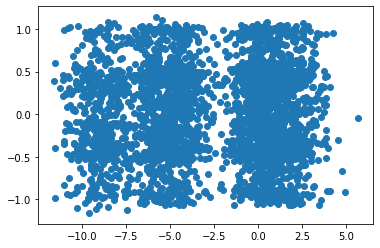

In [158]:
A

plt.scatter(X, A)

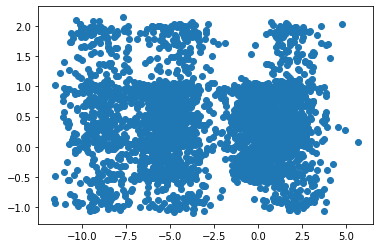

In [84]:
B
plt.scatter(X, B)

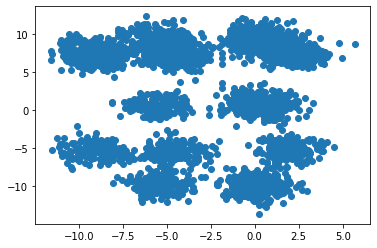

In [87]:
C
plt.scatter(X, C)

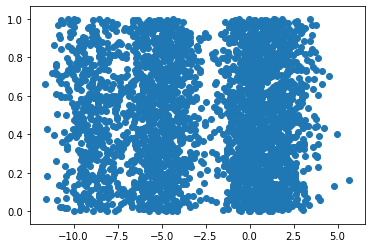

In [88]:
D
plt.scatter(X,D)

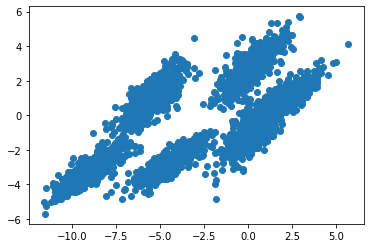

In [145]:
E
plt.scatter(X,E)

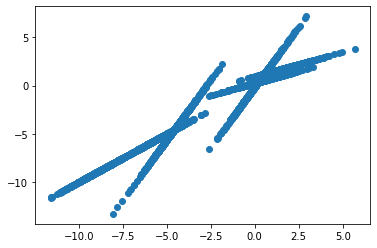

In [90]:
F
plt.scatter(X,F)

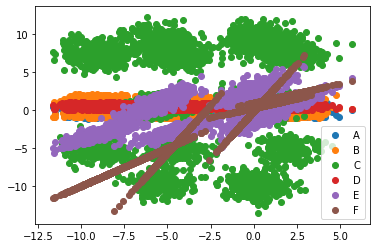

In [156]:
fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(X, A,label='A')
ax1.scatter(X, B, label='B')
ax1.scatter(X, C, label='C')
ax1.scatter(X, D, label='D')
ax1.scatter(X, E, label='E')
ax1.scatter(X, F, label='F')

plt.legend()
plt.show()


## Exercise 2
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/clustering.html#k-means
* 2.1 plot all results
* 2.2 manually try to find the best $k$ for each data set (by visual evaluation)
* 2.3 Use the ```K-Means++``` initialization 

In [69]:
from sklearn.cluster import KMeans

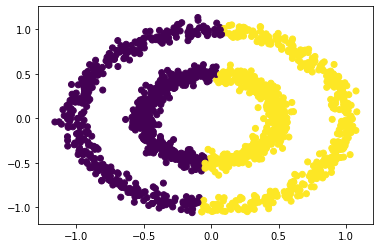

In [135]:
Ameans = KMeans(n_clusters=2, random_state=0)
Ameans.fit(A)
Ameans.predict(A)
plt.scatter(A[:,0],A[:,1],c=Ameans.predict(A))

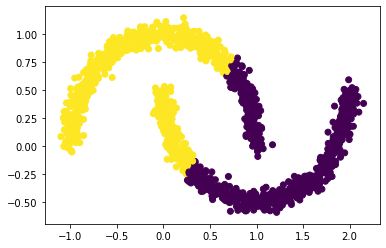

In [125]:
Ameans.fit(B)
Ameans.predict(B)
plt.scatter(B[:,0],B[:,1],c=Ameans.predict(B))

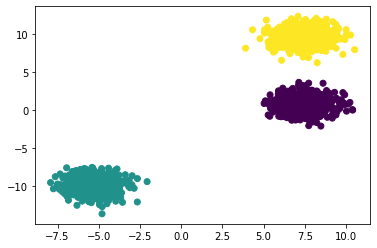

In [129]:
Cmeans = KMeans(n_clusters=3, random_state=0)
Cmeans.fit(C)
Cmeans.predict(C)
plt.scatter(C[:,0],C[:,1],c=Cmeans.predict(C))

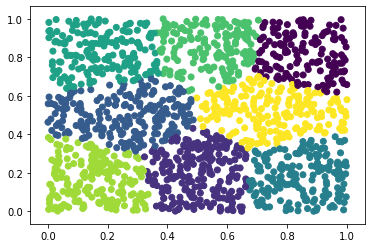

In [139]:
Dmeans = KMeans ()
Dmeans.fit(D)
Dmeans.predict(D)
plt.scatter(D[:,0],D[:,1],c=Dmeans.predict(D))

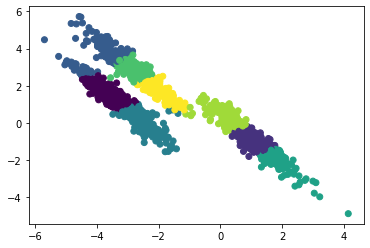

In [137]:
Dmeans.fit(E)
Dmeans.predict(E)
plt.scatter(E[:,0],E[:,1],c=Dmeans.predict(E))

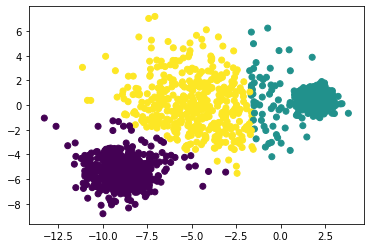

In [132]:
Cmeans.fit(F)
Cmeans.predict(F)
plt.scatter(F[:,0],F[:,1],c=Cmeans.predict(F))

## Exercise 3
Performs ```DBSCAN``` clustering on all data sets and plot all results: https://scikit-learn.org/stable/modules/clustering.html#dbscan

In [147]:
from sklearn.cluster import DBSCAN

In [161]:
dbscan = DBSCAN(eps=0.123, min_samples = 2)
clusters = dbscan.fit_predict(A)

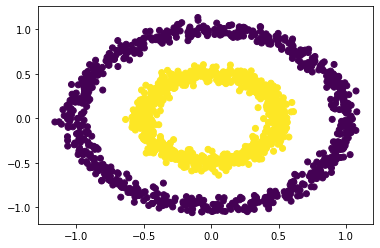

In [162]:
plt.scatter(A[:, 0], A[:, 1], c=clusters)

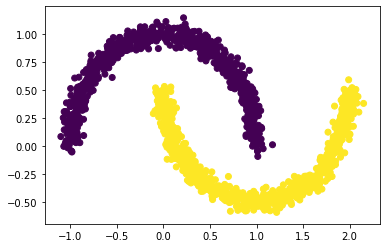

In [163]:
clusters = dbscan.fit_predict(B)
plt.scatter(B[:, 0], B[:, 1], c=clusters)

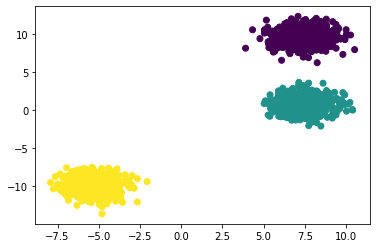

In [181]:
dbscan = DBSCAN(eps=1.99, min_samples = 3)
clustersC = dbscan.fit_predict(C)
plt.scatter(C[:, 0], C[:, 1], c=clustersC)

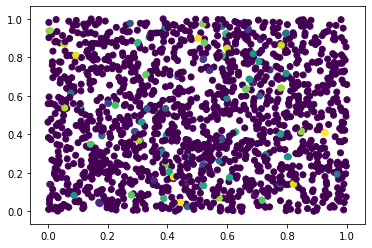

In [216]:
dbscan = DBSCAN(eps=0.005, min_samples = 2)
clustersD = dbscan.fit_predict(D)
plt.scatter(D[:, 0], D[:, 1], c=clustersD)

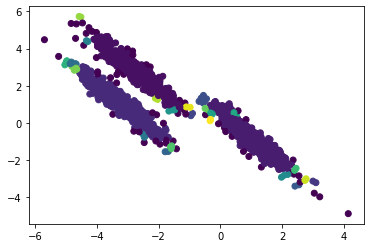

In [212]:
dbscan = DBSCAN(eps=0.15, min_samples = 2)
clustersE = dbscan.fit_predict(E)
plt.scatter(E[:, 0], E[:, 1], c=clustersE)

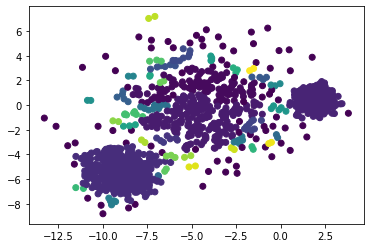

In [205]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
F_scaled = scaler.fit_transform(F)

dbscan = DBSCAN(eps=0.1, min_samples = 2)
clustersF = dbscan.fit_predict(F_scaled)
plt.scatter(F[:, 0], F[:, 1], c=clustersF)